In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("UTMSBA_ACTL.csv")

In [3]:
data.head()

,Dep_dt,Orig,Dest,Tail,Stage_length,ACTL_TM_IN_CENT,ACTL_TM_OUT_CENT,ACFT,Actl_BM,Gross_gal,Enroute_gal,Alt_gal,Cont_gal,Tanker_gal
0,2017-09-01,FYX,ZEY,N09303,240,1005,844,73W,81,536.3,265,0.0,271.4,0.0
1,2017-09-01,ZEY,KMU,N09303,274,1139,1043,73W,56,1145.6,495,378.2,272.4,0.0
2,2017-09-01,KMU,DWF,N09303,1419,1520,1221,73W,179,1923.3,1695,0.0,228.3,0.0
3,2017-09-01,DWF,ZEY,N09303,1213,1838,1556,73W,162,2115.7,1883,0.0,233.1,0.0
4,2017-09-01,ZEY,FSG,N09303,1051,2140,1925,73W,135,2703.5,1432,0.0,241.4,1029.7


In [4]:
len(data)

3257621

In [5]:
data2 = data[data.ACTL_TM_IN_CENT < 2700]
data2 = data2[data2.ACTL_TM_OUT_CENT < 2700]
len(data2)

3252078

In [6]:
#Dates
def date_format(value):
    value = str(value)
    year = int(value[:4])
    month = int(value[5:7])
    day = int(value[8:])
    
    #print(year,month,day)
    date = datetime.date(year,month, day)
    return date 

data2['Dep_dt'] = data2['Dep_dt'].map(date_format)
data2['day_of_week'] = data2['Dep_dt'].apply(lambda x: dt.weekday(x))

#year_month
def year_month(value):
    value = str(value)
    return str(value[:7])

data2['year_month'] = data2['Dep_dt'].map(year_month)

In [7]:
#Arrival time
def hour_of_the_day(time):
    time = str(time)
    return int(time[:-2])

data2['hour_out'] = data2['ACTL_TM_OUT_CENT'].map(hour_of_the_day)
data2['hour_in'] = data2['ACTL_TM_IN_CENT'].map(hour_of_the_day)

In [8]:
#Pull out month
def pull_month(value):
    value = str(value)
    month = int(value[5:7])
    return month

data2['month'] = data2['Dep_dt'].map(pull_month)

In [9]:
#Pull out year
def pull_year(value):
    value = str(value)
    year = int(value[:4])
    return year

data2['year'] = data2['Dep_dt'].map(pull_year)

In [10]:
#Name day of week
import calendar
days = list(calendar.day_abbr)
def name_day(value): 
    return days[value]

data2['day'] = data2['day_of_week'].map(name_day)

In [11]:
#create weeks
data2['Dep_dt'][0].strftime('%W') #first week = 35th week of the year
data2['week_of_year'] = data2['Dep_dt'].apply(lambda x: x.strftime('%W'))

In [12]:
data2.head()

,Dep_dt,Orig,Dest,Tail,Stage_length,ACTL_TM_IN_CENT,ACTL_TM_OUT_CENT,ACFT,Actl_BM,Gross_gal,...,Cont_gal,Tanker_gal,day_of_week,year_month,hour_out,hour_in,month,year,day,week_of_year
0,2017-09-01,FYX,ZEY,N09303,240,1005,844,73W,81,536.3,...,271.4,0.0,4,2017-09,8,10,9,2017,Fri,35
1,2017-09-01,ZEY,KMU,N09303,274,1139,1043,73W,56,1145.6,...,272.4,0.0,4,2017-09,10,11,9,2017,Fri,35
2,2017-09-01,KMU,DWF,N09303,1419,1520,1221,73W,179,1923.3,...,228.3,0.0,4,2017-09,12,15,9,2017,Fri,35
3,2017-09-01,DWF,ZEY,N09303,1213,1838,1556,73W,162,2115.7,...,233.1,0.0,4,2017-09,15,18,9,2017,Fri,35
4,2017-09-01,ZEY,FSG,N09303,1051,2140,1925,73W,135,2703.5,...,241.4,1029.7,4,2017-09,19,21,9,2017,Fri,35


In [13]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [14]:
flights_by_carrier = data2.pivot_table(index='year_month', columns='Orig', values='Gross_gal', aggfunc='sum').fillna(0)
flights_by_carrier.head()

Orig,AIB,AIJ,ALW,AMI,API,AQL,AUT,AVP,BJA,BKV,...,ZEY,ZGQ,ZHB,ZIC,ZJJ,ZMB,ZMS,ZOD,ZTF,ZXU
year_month,,,,,,,,,,,,,,,,,,,,,
2017-09,4294595.0,6084048.7,0.0,0.0,0.0,239183.0,655241.2,422660.1,0.0,1012881.1,...,11461072.2,2361871.5,0.0,0.0,326612.2,3719334.9,102514.7,93346.3,0.0,2251376.6
2017-10,5550518.3,8191004.3,0.0,0.0,0.0,265672.0,720044.0,430421.2,0.0,1123134.0,...,12080760.0,2338895.9,0.0,0.0,295992.5,4396718.1,117089.5,93727.8,0.0,2440066.5
2017-11,6417691.4,7892852.4,0.0,0.0,0.0,265260.3,818180.9,434236.6,0.0,878685.6,...,10386037.0,1909181.6,0.0,0.0,282566.5,4206472.0,111110.3,97098.8,0.0,2336960.0
2017-12,6625545.0,7919199.8,0.0,0.0,0.0,255048.4,862007.2,390475.4,0.0,956284.4,...,10766027.8,2028555.4,0.0,0.0,277847.8,4085517.7,116312.7,91494.5,0.0,2606423.4
2018-01,6870596.3,7538242.0,0.0,0.0,0.0,237653.1,728479.0,449777.0,0.0,836810.7,...,11162889.2,1816541.1,0.0,0.0,165742.0,4027685.4,125341.5,141633.1,0.0,2537074.4


### Auto - ARIMA Model for AIJ
auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [78]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

value = flights_by_carrier.AIJ[0:24]
model = pm.auto_arima(value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=20, max_q=20, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -350.316
Date:                Fri, 06 Mar 2020   AIC                            704.633
Time:                        21:06:21   BIC                            706.904
Sample:                             0   HQIC                           705.204
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.536e+05   2.26e+05      0.680      0.496   -2.89e+05    5.96e+05
sigma2      9.934e+11   3.39e+11      2.931      0.003    3.29e+11    1.66e+12
Ljung-Box (Q):                       25.13   Jarque-

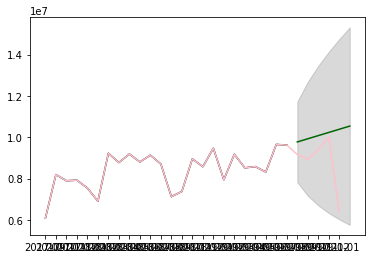

In [79]:
# Forecast
n_periods = 6
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(value), len(value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(value, color = 'black')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.plot(flights_by_carrier.AIJ, color = 'pink')

plt.show()

In [80]:
## RMSE for AIJ
(((flights_by_carrier.AIJ[24:29] - fc[0:5])**2).mean())**0.5

1890539.3188345134

### Build a function to find the forecasts for all the origins using ARIMA

In [100]:
# Build model for Auto ARIMA
def model(column, training_period, predict_period):
    value = column[0:training_period]
    column_len = len(column)
    model_AA = pm.auto_arima(value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=20, max_q=20, # maximum p and q
                      m=12,              # frequency of series is month;y
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=0, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False) # Checks as many models as possible
    n_periods = predict_period + column_len
    fc, confint = model_AA.predict(n_periods=n_periods, return_conf_int=True)
    RMSE = (((column[training_period:column_len] - fc[0:column_len - training_period])**2).mean())**0.5
    return RMSE
    

In [103]:
col_names = flights_by_carrier.columns
num_flights = len(col_names)
result = {}
for i in range(30):
    column = flights_by_carrier[col_names[i]]
    model_RMSE = model(column, 24, 1)
    result[col_names[i]] = model_RMSE
    #print (col_names[i])

C:\Users\alish\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:328: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Users\alish\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:328: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Users\alish\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:328: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Users\alish\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:328: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Users\alish\AppData\Roaming\Python\Python37\site-packages\pmdarim

In [105]:
results_df = pd.DataFrame.from_dict(result, orient = 'index', columns = ['RMSE'])

In [106]:
results_df.to_csv('Auto_Arima Results.csv')